# Importing libraries

In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization too
import plotly.express as px # Interactive Data Visualization
!pip install -U plotly


# Reading data

In [2]:
data = pd.read_csv('cars.csv')

# Exploratory Data Analysis
## Searching for null values, deleting the duplicates

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [4]:
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [7]:
data['MSRP'] = data['MSRP'].str.replace("$","")
data['MSRP'] = data['MSRP'].str.replace(",","")
data['MSRP'] = data['MSRP'].astype(int)
data['MSRP']

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 428, dtype: int64

In [8]:
data['Invoice'] = data['Invoice'].str.replace("$","")
data['Invoice'] = data['Invoice'].str.replace(",","")
data['Invoice'] = data['Invoice'].astype(int)
data['Invoice']

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 428, dtype: int64

In [9]:
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


# Scatter Matrix (Plotly Express) and Scatter Pairplot (Seaborn)
## Scatter Matrix...

In [10]:
fig = px.scatter_matrix(data, width=1500, height=1500)
fig.show()

## ...and Scatter Pairplot

/Users/jjay/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 2000x2000 with 0 Axes>

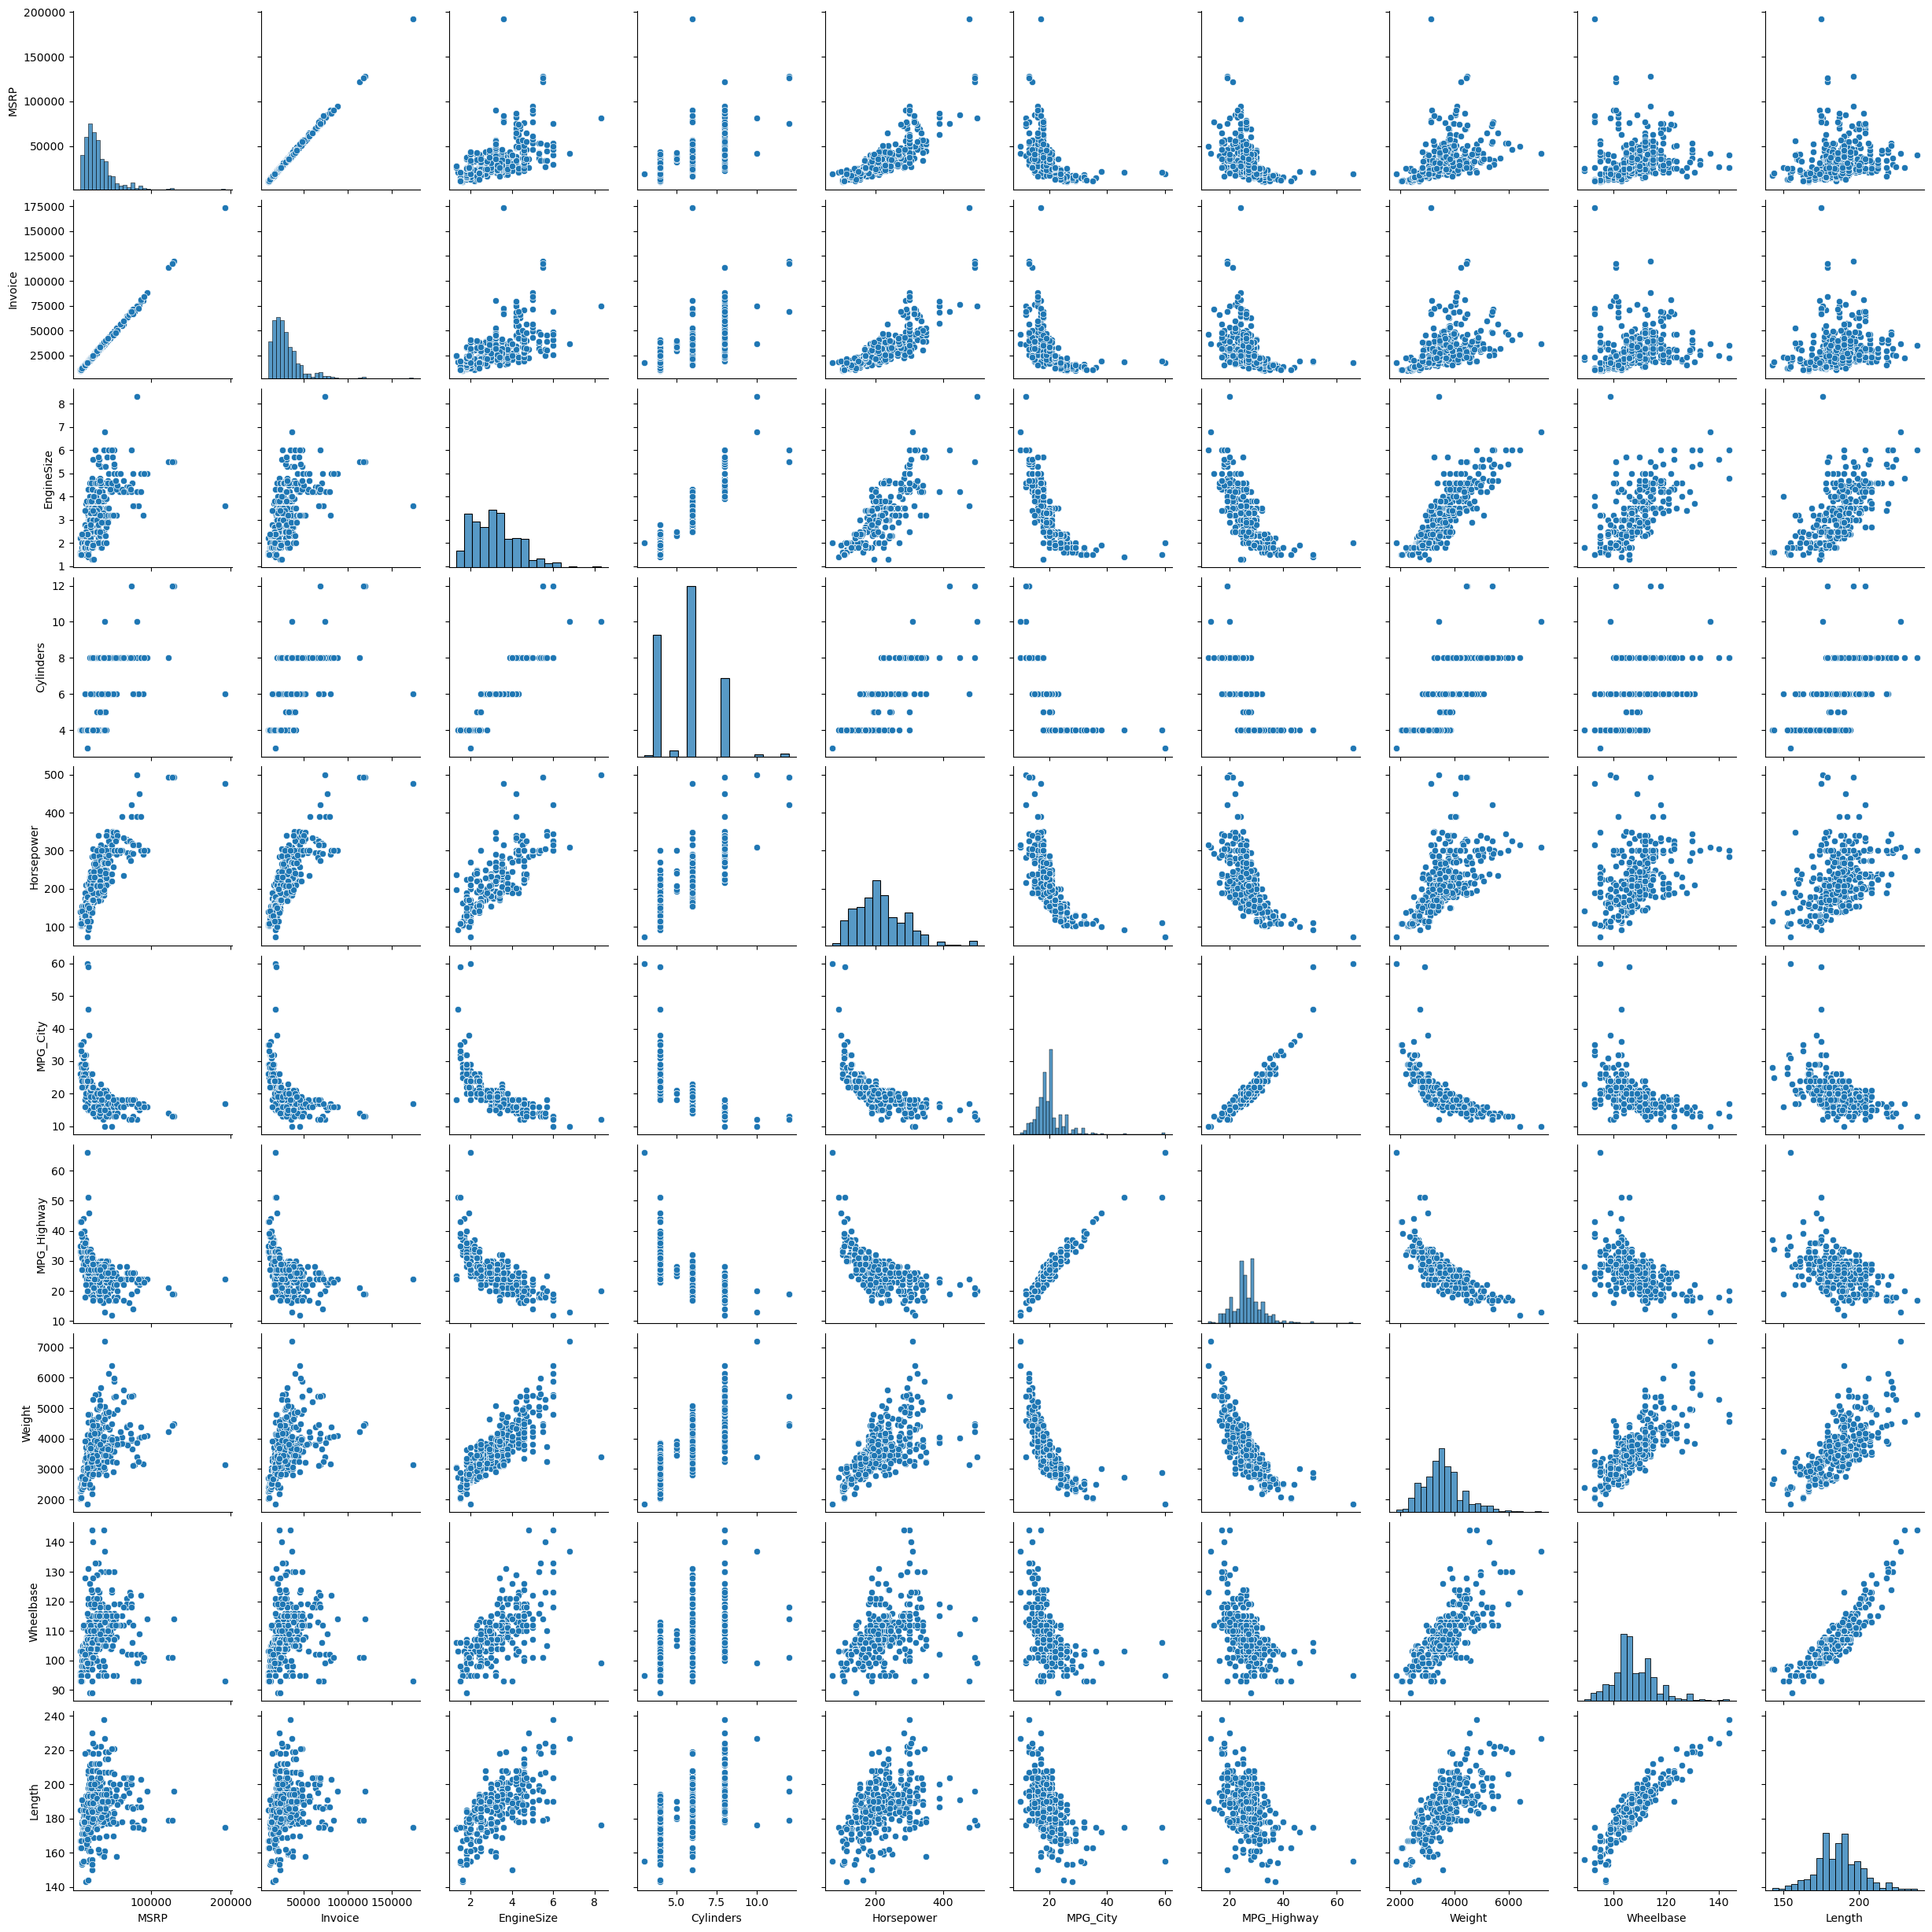

In [11]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(data) 

# Plotting a complex scatterplot between two variables 
## (A scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text, using the 'Cylinders' column to display color)


In [12]:
# Plotting a scatterplot between 'Horsepower' and 'MSRP' while showing 'Make' as text, using the 'Cylinders' column to display color
fig = px.scatter(data, x = 'Horsepower', y = 'MSRP', text = 'Make',color='Cylinders')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.update_layout(width = 1000)
fig.show()

# Plotting various histograms using Plotly Express

In [13]:
#Plotting the histogram of Make and Type of the car using Plotly Express
fig = px.histogram(data, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "Makes of the car",
                  color_discrete_sequence = ["maroon"])
fig.show()

In [14]:
# Viewing various types of the cars
data.Type.unique()

fig = px.histogram(data, x = "Type",
                  labels = {"Type":"Type"},
                  title = "Types of the car",
                  color_discrete_sequence = ["gray"])
                  
fig.show()

In [15]:
#Histogram - Plotly Express; Makes and Types of cars
fig = px.histogram(data, x = "Make",
                  color = "Type",
                  labels = {"Make":"Manufacturer"},
                  title = "Make and Type of a car",
                  opacity = 1)
                  
fig.show()

In [16]:
# Plotting the make of the car and its location
fig = px.histogram(data, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "Make of the car Vs its location")
                  
fig.show()

# Testing Wordcloud 

In [17]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS

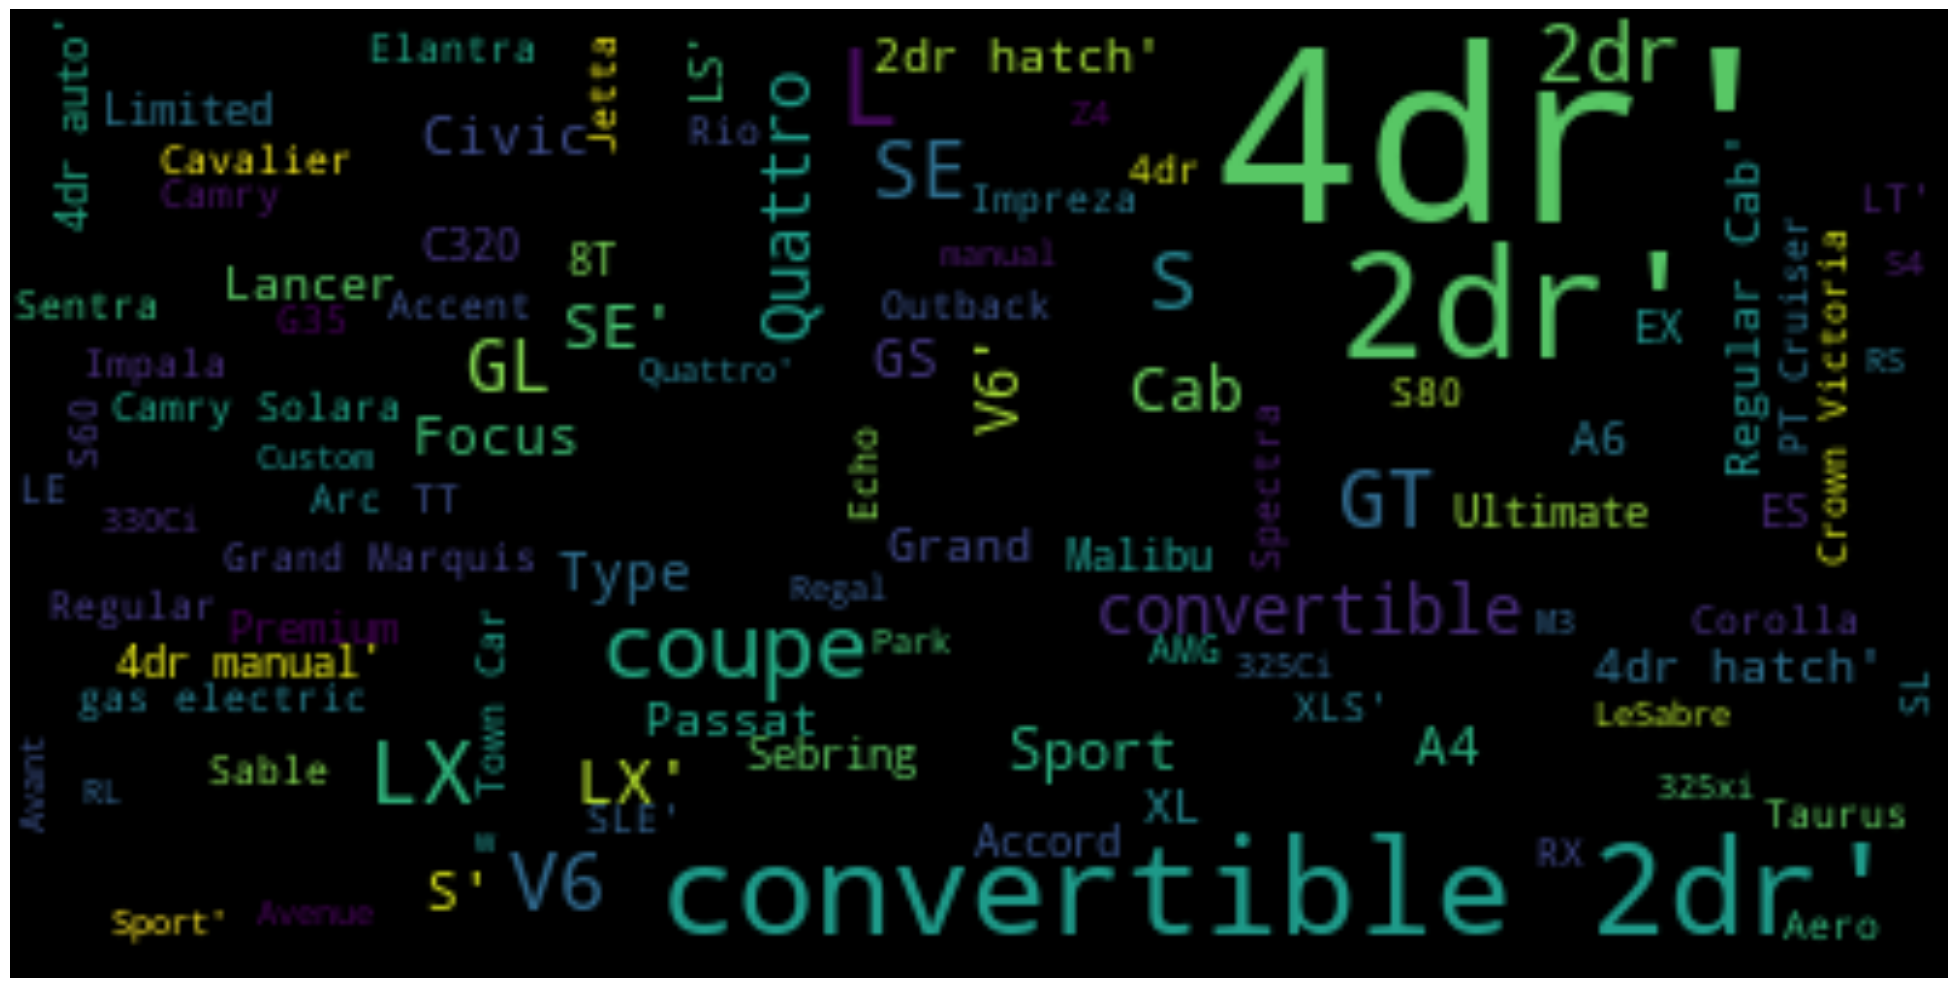

In [18]:
text = data.Model.values

stopwords = set(STOPWORDS)

wc = WordCloud(background_color = "black", max_words = 100, max_font_size = 50, random_state = 42, 
              stopwords = stopwords, contour_width = 3).generate(str(text))       

fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Correlation matrixes
## Obtaining the correlation matrix

In [19]:
num_cols = data.select_dtypes(include=['number'])
corr_matrix = num_cols.corr()
print(corr_matrix)

                 MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.571753   0.649742    0.826945 -0.475020   
Invoice      0.999132  1.000000    0.564498   0.645226    0.823746 -0.470442   
EngineSize   0.571753  0.564498    1.000000   0.908002    0.787435 -0.709471   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.826945  0.823746    0.787435   0.810341    1.000000 -0.676699   
MPG_City    -0.475020 -0.470442   -0.709471  -0.684402   -0.676699  1.000000   
MPG_Highway -0.439622 -0.434585   -0.717302  -0.676100   -0.647195  0.941021   
Weight       0.448426  0.442332    0.807867   0.742209    0.630796 -0.737966   
Wheelbase    0.152000  0.148328    0.636517   0.546730    0.387398 -0.507284   
Length       0.172037  0.166586    0.637448   0.547783    0.381554 -0.501526   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.439622  0.448426   0.152000  0.172037  
Inv

## Correlation matrix - Plotly Express

In [20]:
## Correlation matrix - Plotly Express

In [21]:
## Correlation matrix - Plotly Express

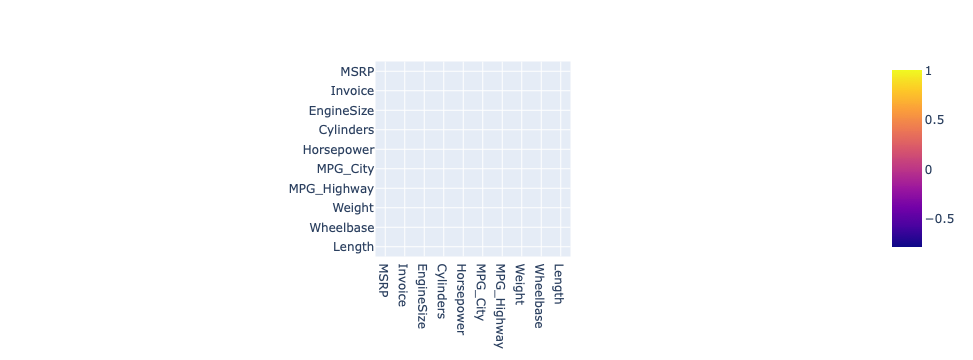

In [22]:
fig = px.imshow(corr_matrix)
fig.show()

## Correlation matrix - Seaborn

<Axes: >

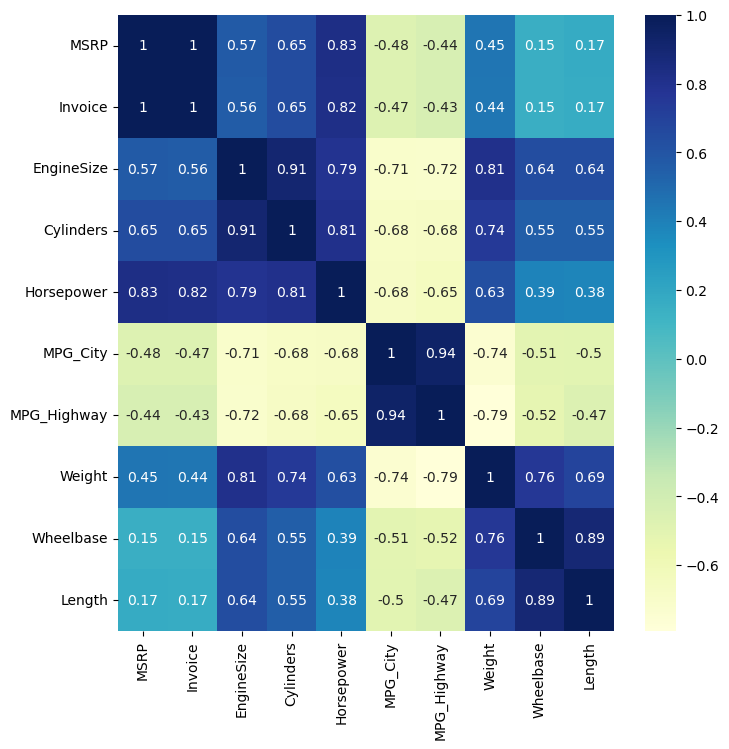

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot = True)


# Conclusions

### Examples:
1. Positive correlation between Engine size and Number of cylinders,
2. Positive correlation between Horsepower and Number of ylinders,
3. The highest positive correlation with MSRP is Horsepower
4. The greatest negative correlation between MPG_Highway and Weight
5. Most common cars of choice have 4-doors'
6. The only manufacturers of Hybrid cars from the database are Toyota and Honda
7. Most common models of choice are Sedans